In [2]:
from keras.datasets import boston_housing
(train_data,train_tar),(test_data,test_tar)=boston_housing.load_data()
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

Using TensorFlow backend.


In [3]:
train_data[1]

array([-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
        1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
       -1.71818909,  0.43190599, -1.32920239])

In [4]:
from keras import models
from keras import layers
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [10]:
build_model()

In [5]:
import numpy as np
k=4
num_val_samples=len(train_data)
num_epochs=100
all_scores=[]

for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_tar=train_tar[i*num_val_samples : (i+1)*num_val_samples]
    
    partial_train_data=np.concatenate(
    [train_data[:i*num_val_samples],
    train_data[(i+1)*num_val_samples:]],
    axis=0)
    partial_train_tar=np.concatenate(
    [train_tar[:i*num_val_samples],
    train_tar[(i+1)*num_val_samples:]],
    axis=0)
    
    model=build_model()
    model.fit(partial_train_data,partial_train_tar,epochs=num_epochs,batch_size=1,verbose=0)
    print(model.evaluate(test_data,test_tar)[1])
    #val_mse,val_mae=model.evaluate(val_data,val_tar,verbose=0)
    #all_scores.append(val_mae)

processing fold # 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
102/102 [==============================] - 0s 2ms/step
23.119718215044806
processing fold # 1


KeyboardInterrupt: 

In [28]:
len(predict)

404

In [57]:
predict=model.predict(train_data)
predict_list=[]
for i in predict:
    predict_list.append(i[0])
compare=list(zip(predict_list,train_tar))

In [7]:
import pandas as pd
df=pd.DataFrame(compare)

NameError: name 'compare' is not defined

In [59]:
df=df.sort_values(1)
df=df.reset_index(drop=True)

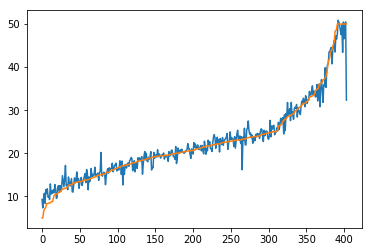

In [60]:
import matplotlib.pyplot as plt
plt.plot(df)
plt.show()

In [8]:
bjdf=pd.read_csv('littledata.csv')
pd.set_option('max_columns',30)

In [9]:
bjdf.drop(['ID','Lng','Lat','CommunityID'],axis=1,inplace=True)
print(bjdf.head())

             TradeTime     DOM  Followers  Total price    Price  Square  \
0  2016-08-09 00:00:00  1464.0      106.0        415.0  31680.0  131.00   
1  2016-07-28 00:00:00   903.0      126.0        575.0  43436.0  132.38   
2  2016-12-11 00:00:00  1271.0       48.0       1030.0  52021.0  198.00   
3  2016-09-30 00:00:00   965.0      138.0        297.5  22202.0  134.00   
4  2016-08-28 00:00:00   927.0      286.0        392.0  48396.0   81.00   

   Bed Room  Living room  Kitchen  Bathroom     楼 Building Type  \
0       2.0          1.0      1.0       1.0  高 26            塔楼   
1       2.0          2.0      1.0       2.0  高 22            塔楼   
2       3.0          2.0      1.0       3.0   中 4            板楼   
3       3.0          1.0      1.0       1.0  底 21            塔楼   
4       2.0          1.0      1.0       1.0   中 6            板楼   

   Construction time renovation condition building structure  \
0               2005                   简装                 钢混   
1               20

In [17]:
pd.set_option('max_rows',1000)
for row in bjdf.iterrows():
    try:
        bjdf.loc[row[0],'floor']=int(bjdf.loc[row[0],'floor'])
    except:
        print(row[0])

In [20]:
bjdf['floor_level']=None
bjdf['floor']=None
floor_match={'顶':5,'高':4,'中':3,'低':2,'底':1}
for row in bjdf.iterrows():
    words=(bjdf.loc[row[0],'楼']).split(' ')
    bjdf.loc[row[0],'floor_level']=floor_match[words[0]]
    bjdf.loc[row[0],'floor']=words[1]
bjdf.drop(['楼'],axis=1,inplace=True) 


KeyError: '楼'

In [11]:

ren_cond_list=bjdf['renovation condition'].unique()#所有装修状况的列表
ren_cond_dict={}
i=1
for item in ren_cond_list:#将装修状况与其平均价格相对应
    ren_cond_dict[item]=bjdf[bjdf['renovation condition']==item]['Price'].mean()   
   
bud_stru_list=bjdf['building structure'].unique()#所有结构的列表
bud_stru_dict={}
for item in bud_stru_list:#将结构与其平均价格相对应
    bud_stru_dict[item]=bjdf[bjdf['building structure']==item]['Price'].mean()
    
bud_typ_list=bjdf['Building Type'].unique()#所有类型的列表
bud_typ_dict={}
for item in bud_typ_list:#将类型与其平均价格相对应
    bud_typ_dict[item]=bjdf[bjdf['Building Type']==item]['Price'].mean()
    

dist_list=bjdf['District'].unique()#所有地区的列表
dist_dict={}
for item in dist_list:#将地区与其平均价格相对应
    dist_dict[item]=bjdf[bjdf['District']==item]['Price'].mean()


In [141]:
bjdf=bjdf1.copy()#留存备份
bjdf2=bjdf1.copy()

In [12]:
#将文字信息转化为对应的数值信息
yearunknown=[]
for row in bjdf.iterrows():
    bjdf.loc[row[0],'Building Type']=bud_typ_dict[bjdf.loc[row[0],'Building Type']]
    bjdf.loc[row[0],'renovation condition']=ren_cond_dict[bjdf.loc[row[0],'renovation condition']]
    bjdf.loc[row[0],'building structure']=bud_stru_dict[bjdf.loc[row[0],'building structure']]
    bjdf.loc[row[0],'TradeTime']=pd.to_datetime(bjdf.loc[row[0],'TradeTime'])
    bjdf.loc[row[0],'District']=dist_dict[bjdf.loc[row[0],'District']]
    try:
        int(bjdf.loc[row[0],'Construction time'])
    except:
        yearunknown.append(row[0])
bjdf.drop(yearunknown,inplace=True)

In [14]:
bjdf.floor=pd.to_numeric(bjdf.floor,errors='ignore')
bjdf.floor_level=pd.to_numeric(bjdf.floor_level,errors='ignore')


In [15]:
bjdf_output=bjdf['Price']
bjdf_input=bjdf.drop(['TradeTime','Total price','Price'],axis=1)#选出输入、输出值
train_data=bjdf_input.iloc[0:700,:]
train_tar=bjdf_output.iloc[0:700]
test_data=bjdf_input.iloc[700:,:]
test_tar=bjdf_output.iloc[700:]

In [19]:
train_data

,DOM,Followers,Square,Bed Room,Living room,Kitchen,Bathroom,Building Type,Construction time,renovation condition,building structure,Ladder ratio(梯户比),Elevator,Property rights for five years（房屋满五年）,Subway,District,Community average,floor_level,floor
0,1464.0,106.0,131.00,2.0,1.0,1.0,1.0,47724.8,2005,46129.7,48507.6,0.217,1.0,0.0,1.0,49853.7,56021.0,4,26
1,903.0,126.0,132.38,2.0,2.0,1.0,2.0,47724.8,2004,49844.1,48507.6,0.667,1.0,1.0,0.0,49853.7,71539.0,4,22
2,1271.0,48.0,198.00,3.0,2.0,1.0,3.0,44886.5,2005,46129.7,48507.6,0.500,1.0,0.0,0.0,49853.7,48160.0,3,4
3,965.0,138.0,134.00,3.0,1.0,1.0,1.0,47724.8,2008,36589.6,48507.6,0.273,1.0,0.0,0.0,27863.8,51238.0,1,21
4,927.0,286.0,81.00,2.0,1.0,1.0,1.0,44886.5,1960,39981,43331.9,0.333,0.0,1.0,1.0,75679.3,62588.0,3,6
5,861.0,57.0,53.00,1.0,0.0,1.0,1.0,44886.5,2005,46129.7,48507.6,0.333,1.0,1.0,0.0,49853.7,67738.0,3,8
6,851.0,167.0,73.00,2.0,1.0,1.0,1.0,44886.5,1997,49844.1,43331.9,0.500,0.0,0.0,0.0,49853.7,50112.0,4,6
7,904.0,138.0,161.55,3.0,2.0,1.0,2.0,47724.8,2004,49844.1,48507.6,0.667,1.0,1.0,0.0,49853.7,71539.0,4,22
8,873.0,218.0,48.00,1.0,0.0,1.0,1.0,50170.4,2009,36589.6,43331.9,0.333,0.0,0.0,0.0,26885.3,44235.0,4,10
9,865.0,134.0,68.00,1.0,0.0,0.0,0.0,47724.8,2009,49844.1,48507.6,0.308,1.0,1.0,1.0,75679.3,78590.0,3,23


In [18]:
mean=train_data.iloc.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

AttributeError: '_iLocIndexer' object has no attribute 'mean'

In [155]:
from keras import models
from keras import layers
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [158]:
import numpy as np
k=5
num_val_samples=len(train_data)
num_epochs=200
all_scores=[]

for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_tar=train_tar[i*num_val_samples : (i+1)*num_val_samples]
    
    partial_train_data=np.concatenate(
    [train_data[:i*num_val_samples],
    train_data[(i+1)*num_val_samples:]],
    axis=0)
    partial_train_tar=np.concatenate(
    [train_tar[:i*num_val_samples],
    train_tar[(i+1)*num_val_samples:]],
    axis=0)
    
    model=build_model()
    model.fit(partial_train_data,partial_train_tar,epochs=num_epochs,batch_size=1,verbose=0)
    print(model.evaluate(test_data,test_tar)[1])

processing fold # 0
250/250 [==============================] - 1s 5ms/step
61558.0543125
processing fold # 1
250/250 [==============================] - 1s 2ms/step
6093.095390625
processing fold # 2
250/250 [==============================] - 1s 2ms/step
5976.90812109375
processing fold # 3
250/250 [==============================] - 1s 2ms/step
6046.7039453125
processing fold # 4


KeyboardInterrupt: 

In [1]:
predict=model.predict(test_data)
predict_list=[]
for i in predict:
    predict_list.append(i[0]-test_tar[i])
compare=list(zip(predict_list,test_tar))
df=pd.DataFrame(compare)
df=df.sort_values(1)
df=df.reset_index(drop=True)
plt.plot(df)
plt.show()

NameError: name 'model' is not defined